# Семинар 2. Линейная регрессия

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Physicochemical Properties of Protein Tertiary Structure Data Set

RMSD-Size of the residue.

F1 - Total surface area.

F2 - Non polar exposed area.

F3 - Fractional area of exposed non polar residue.

F4 - Fractional area of exposed non polar part of residue.

F5 - Molecular mass weighted exposed area.

F6 - Average deviation from standard exposed area of residue.

F7 - Euclidian distance.

F8 - Secondary structure penalty.

F9 - Spacial Distribution constraints (N,K Value).


Читаем датасет

In [143]:
data = pd.read_csv('Shanghai_HMT_2010.csv')

In [144]:
print("data.shape = ", data.shape)
data.head(10)

data.shape =  (52584, 17)


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0
5,6,2010,1,1,5,4,NaN,NaN,NaN,-7.0,59.21,1023.0,0.0,SE,11.0,0.0,0.0
6,7,2010,1,1,6,4,NaN,NaN,NaN,-6.0,59.48,1023.0,1.0,SE,14.0,0.0,0.0
7,8,2010,1,1,7,4,NaN,NaN,NaN,-5.0,64.18,1023.0,1.0,SE,17.0,0.0,0.0
8,9,2010,1,1,8,4,NaN,NaN,NaN,-3.0,69.43,1023.0,2.0,SE,20.0,0.0,0.0
9,10,2010,1,1,9,4,NaN,NaN,NaN,-2.0,64.90,1023.0,4.0,SE,23.0,0.0,0.0


In [145]:
data = data.dropna() 

In [146]:
print("data.shape = ", data.shape)
data.head(10)

data.shape =  (21436, 17)


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
26304,26305,2013,1,1,0,4,66.0,70.0,71.0,-5.0,69.00,1023.0,0.0,SW,60.0,0.0,0.0
26305,26306,2013,1,1,1,4,67.0,76.0,72.0,-5.0,69.00,1023.0,0.0,SW,62.0,0.0,0.0
26307,26308,2013,1,1,3,4,73.0,78.0,74.0,-4.0,74.41,1023.0,0.0,SW,65.0,0.0,0.0
26308,26309,2013,1,1,4,4,75.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,68.0,0.0,0.0
26309,26310,2013,1,1,5,4,73.0,78.0,80.0,-4.0,80.04,1023.0,-1.0,SW,70.0,0.0,0.0
26310,26311,2013,1,1,6,4,74.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,71.0,0.0,0.0
26311,26312,2013,1,1,7,4,73.0,80.0,84.0,-4.0,86.15,1024.0,-2.0,cv,0.0,0.0,0.0
26312,26313,2013,1,1,8,4,77.0,76.0,87.0,-5.0,79.89,1024.0,-2.0,cv,1.0,0.0,0.0
26313,26314,2013,1,1,9,4,73.0,74.0,91.0,-3.0,60.25,1025.0,4.0,SW,4.0,0.0,0.0
26314,26315,2013,1,1,10,4,82.0,76.0,88.0,-4.0,48.63,1025.0,6.0,SW,8.0,0.0,0.0


<AxesSubplot:>

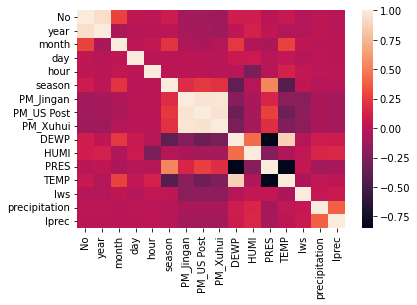

In [147]:
list_of_column_names = data.columns
sns.heatmap(data[list_of_column_names].corr(method="pearson"))

#### Нормализация

In [148]:
# data_columns = data[['PM_Jingan', 'PM_Xuhui']]
data_for_norm = data.drop(['cbwd'], axis=1)
# data_for_norm = data_for_norm.drop(['PM_Jingan'], axis=1)
# data_for_norm = data_for_norm.drop(['PM_Xuhui'], axis=1)  # Не заметил разницы
data_for_norm

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
26304,26305,2013,1,1,0,4,66.0,70.0,71.0,-5.0,69.00,1023.0,0.0,60.0,0.0,0.0
26305,26306,2013,1,1,1,4,67.0,76.0,72.0,-5.0,69.00,1023.0,0.0,62.0,0.0,0.0
26307,26308,2013,1,1,3,4,73.0,78.0,74.0,-4.0,74.41,1023.0,0.0,65.0,0.0,0.0
26308,26309,2013,1,1,4,4,75.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,68.0,0.0,0.0
26309,26310,2013,1,1,5,4,73.0,78.0,80.0,-4.0,80.04,1023.0,-1.0,70.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52578,52579,2015,12,31,18,4,93.0,92.0,90.0,-2.0,60.51,1035.0,5.0,12.0,0.0,0.0
52579,52580,2015,12,31,19,4,86.0,82.0,90.0,-1.0,65.13,1035.0,5.0,15.0,0.0,0.0
52580,52581,2015,12,31,20,4,83.0,93.0,86.0,1.0,70.27,1035.0,6.0,19.0,0.0,0.0
52581,52582,2015,12,31,21,4,85.0,90.0,95.0,1.0,70.27,1036.0,6.0,22.0,0.0,0.0


In [149]:
# data = (data - data.mean()) / data.std()
data = (data_for_norm - data_for_norm.mean()) / data_for_norm.std()

In [150]:
# data['PM_Jingan'] = data_columns['PM_Jingan']
# data['PM_Xuhui'] = data_columns['PM_Xuhui']
# data['month'] = data_columns['month']
# data['day'] = data_columns['day']
# data['hour'] = data_columns['hour']

In [151]:
print("data.shape = ", data.shape)
data.head(10)

data.shape =  (21436, 16)


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
26304,-1.747421,-1.207702,-1.557791,-1.676535,-1.754596,1.347979,0.166925,0.366599,0.252477,-1.704071,0.018112,0.774887,-1.961308,0.173173,-0.129194,-0.128254
26305,-1.747285,-1.207702,-1.557791,-1.676535,-1.606006,1.347979,0.187698,0.505240,0.272791,-1.704071,0.018112,0.774887,-1.961308,0.202715,-0.129194,-0.128254
26307,-1.747014,-1.207702,-1.557791,-1.676535,-1.308825,1.347979,0.312340,0.551454,0.313421,-1.598843,0.317001,0.774887,-1.961308,0.247030,-0.129194,-0.128254
26308,-1.746878,-1.207702,-1.557791,-1.676535,-1.160234,1.347979,0.353887,0.528347,0.374365,-1.598843,0.628044,0.774887,-2.072632,0.291344,-0.129194,-0.128254
26309,-1.746743,-1.207702,-1.557791,-1.676535,-1.011644,1.347979,0.312340,0.551454,0.435309,-1.598843,0.628044,0.774887,-2.072632,0.320887,-0.129194,-0.128254
26310,-1.746607,-1.207702,-1.557791,-1.676535,-0.863053,1.347979,0.333113,0.528347,0.374365,-1.598843,0.628044,0.774887,-2.072632,0.335658,-0.129194,-0.128254
26311,-1.746472,-1.207702,-1.557791,-1.676535,-0.714463,1.347979,0.312340,0.597668,0.516567,-1.598843,0.965606,0.886541,-2.183956,-0.713111,-0.129194,-0.128254
26312,-1.746336,-1.207702,-1.557791,-1.676535,-0.565872,1.347979,0.395434,0.505240,0.577511,-1.704071,0.619757,0.886541,-2.183956,-0.698340,-0.129194,-0.128254
26313,-1.746200,-1.207702,-1.557791,-1.676535,-0.417282,1.347979,0.312340,0.459026,0.658770,-1.493614,-0.465303,0.998194,-1.516012,-0.654026,-0.129194,-0.128254
26314,-1.746065,-1.207702,-1.557791,-1.676535,-0.268691,1.347979,0.499301,0.505240,0.597826,-1.598843,-1.107278,0.998194,-1.293365,-0.594940,-0.129194,-0.128254


Разбиваем данные тест и трейн

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(data[['DEWP','HUMI', 'Iprec', 'Iws']], data['PRES'], test_size=0.33)

Линейная регрессия

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score

In [155]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [156]:
predictions, y_test

(array([-0.84109226, -0.36725646,  1.08830684, ..., -0.79725781,
        -1.01614232,  1.02943981]),
 32492   -0.676609
 42375   -0.118342
 45363    0.998194
 41259   -0.229995
 30418   -0.899917
            ...   
 27057    0.328273
 44957    0.439926
 40797   -0.229995
 47916   -0.899917
 43243    0.998194
 Name: PRES, Length: 7074, dtype: float64)

In [157]:
mean_squared_error(predictions, y_test)

0.24948270232954362

#### Коэффициенты модели

In [158]:
w_0 = model.intercept_
w_1 = model.coef_[0]
print("w_0 = ", w_0)
print("w_1 = ", w_1)

w_0 =  0.0005623924927197496
w_1 =  -0.9245799309000958


In [159]:
model.coef_

array([-9.24579931e-01,  1.87722723e-01, -4.15579084e-02,  2.09782130e-04])

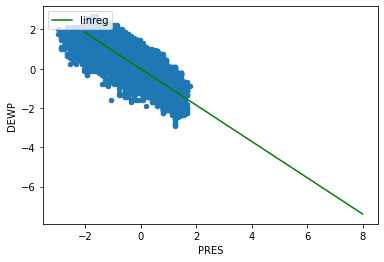

In [160]:
f = lambda x: w_0 + w_1 * x
x = np.linspace(-2, 8, 100)
y_1 = f(x)

data.plot(x='DEWP', y='PRES', kind='scatter')
plt.plot(x, y_1, label='linreg', color='g')

plt.ylabel('DEWP')
plt.xlabel('PRES')
plt.legend(loc='upper left')
plt.show()

Используем все данные

In [169]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['PRES'], axis=1), data['PRES'], test_size=0.33)

In [170]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [171]:
mean_squared_error(predictions, y_test)

0.1842178614008839

In [172]:
model.coef_

array([ 2.93713912e+01, -2.82941674e+01, -9.97030931e+00, -8.13660235e-01,
       -2.02389844e-02,  8.99938972e-02, -1.41428373e-02,  4.68060871e-02,
       -1.04573127e-01,  3.30451786e-01, -4.17891488e-01, -1.13137856e+00,
       -2.41452414e-02, -1.55018114e-02, -2.05864454e-02])